## AI Project UCS415 
#### Finding Popularity of Spotify Songs 
Nitansh Jain  102017025

``` Importing Pandas and Numpy ``` 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn

Converting data from the csv file to a dataframe

In [42]:
spotify_df = pd.read_csv('top10s.csv', encoding='latin-1')
spotify_df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [43]:
# checking if any null or nan values are present
print(spotify_df.isna().sum())

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64


In [44]:
# checking data types of all columns
spotify_df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

In [45]:
# converting name of column top genre to genre
spotify_df = spotify_df.rename(columns={'top genre': 'genre', 'pop': 'popularity'})
spotify_df.head()

,Unnamed: 0,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [46]:
#  dropping adele song with bpm = 0
spotify_df.drop(spotify_df[(spotify_df['bpm'] == 0) & spotify_df['artist']=='Adele'].index, inplace=True)

In [47]:
# getting columns from spotify_df from bpm to artist_type via loc
spotify_features = spotify_df

# dropping column added and top year from dataframe
spotify_features.drop(['title', 'Unnamed: 0' ,'year'], axis=1, inplace=True)
spotify_df.head()


,artist,genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4,83
1,Eminem,detroit hip hop,87,93,75,-5,52,64,263,24,23,82
2,Kesha,dance pop,120,84,76,-3,29,71,200,10,14,80
3,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4,79
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4,78


In [48]:
# checking correlation table
spotify_features.head()
spotify_features.corr(method='pearson')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
bpm,1.000000,0.095070,-0.176331,0.048817,0.072284,-0.002492,-0.029381,-0.121118,0.051148,-0.018128
nrgy,0.095070,1.000000,0.137382,0.663623,0.180074,0.400945,-0.145399,-0.576507,0.100965,-0.093693
dnce,-0.176331,0.137382,1.000000,0.129737,-0.040512,0.494928,-0.179794,-0.250560,-0.037757,0.082394
dB,0.048817,0.663623,0.129737,1.000000,0.062574,0.342983,-0.168415,-0.349600,-0.061267,0.014400
live,0.072284,0.180074,-0.040512,0.062574,1.000000,0.015081,0.098645,-0.099917,0.141947,-0.087770
val,-0.002492,0.400945,0.494928,0.342983,0.015081,1.000000,-0.263175,-0.252936,0.118355,0.021746
dur,-0.029381,-0.145399,-0.179794,-0.168415,0.098645,-0.263175,1.000000,0.091917,0.054747,-0.105707
acous,-0.121118,-0.576507,-0.250560,-0.349600,-0.099917,-0.252936,0.091917,1.000000,0.001483,0.021837
spch,0.051148,0.100965,-0.037757,-0.061267,0.141947,0.118355,0.054747,0.001483,1.000000,-0.050956
popularity,-0.018128,-0.093693,0.082394,0.014400,-0.087770,0.021746,-0.105707,0.021837,-0.050956,1.000000


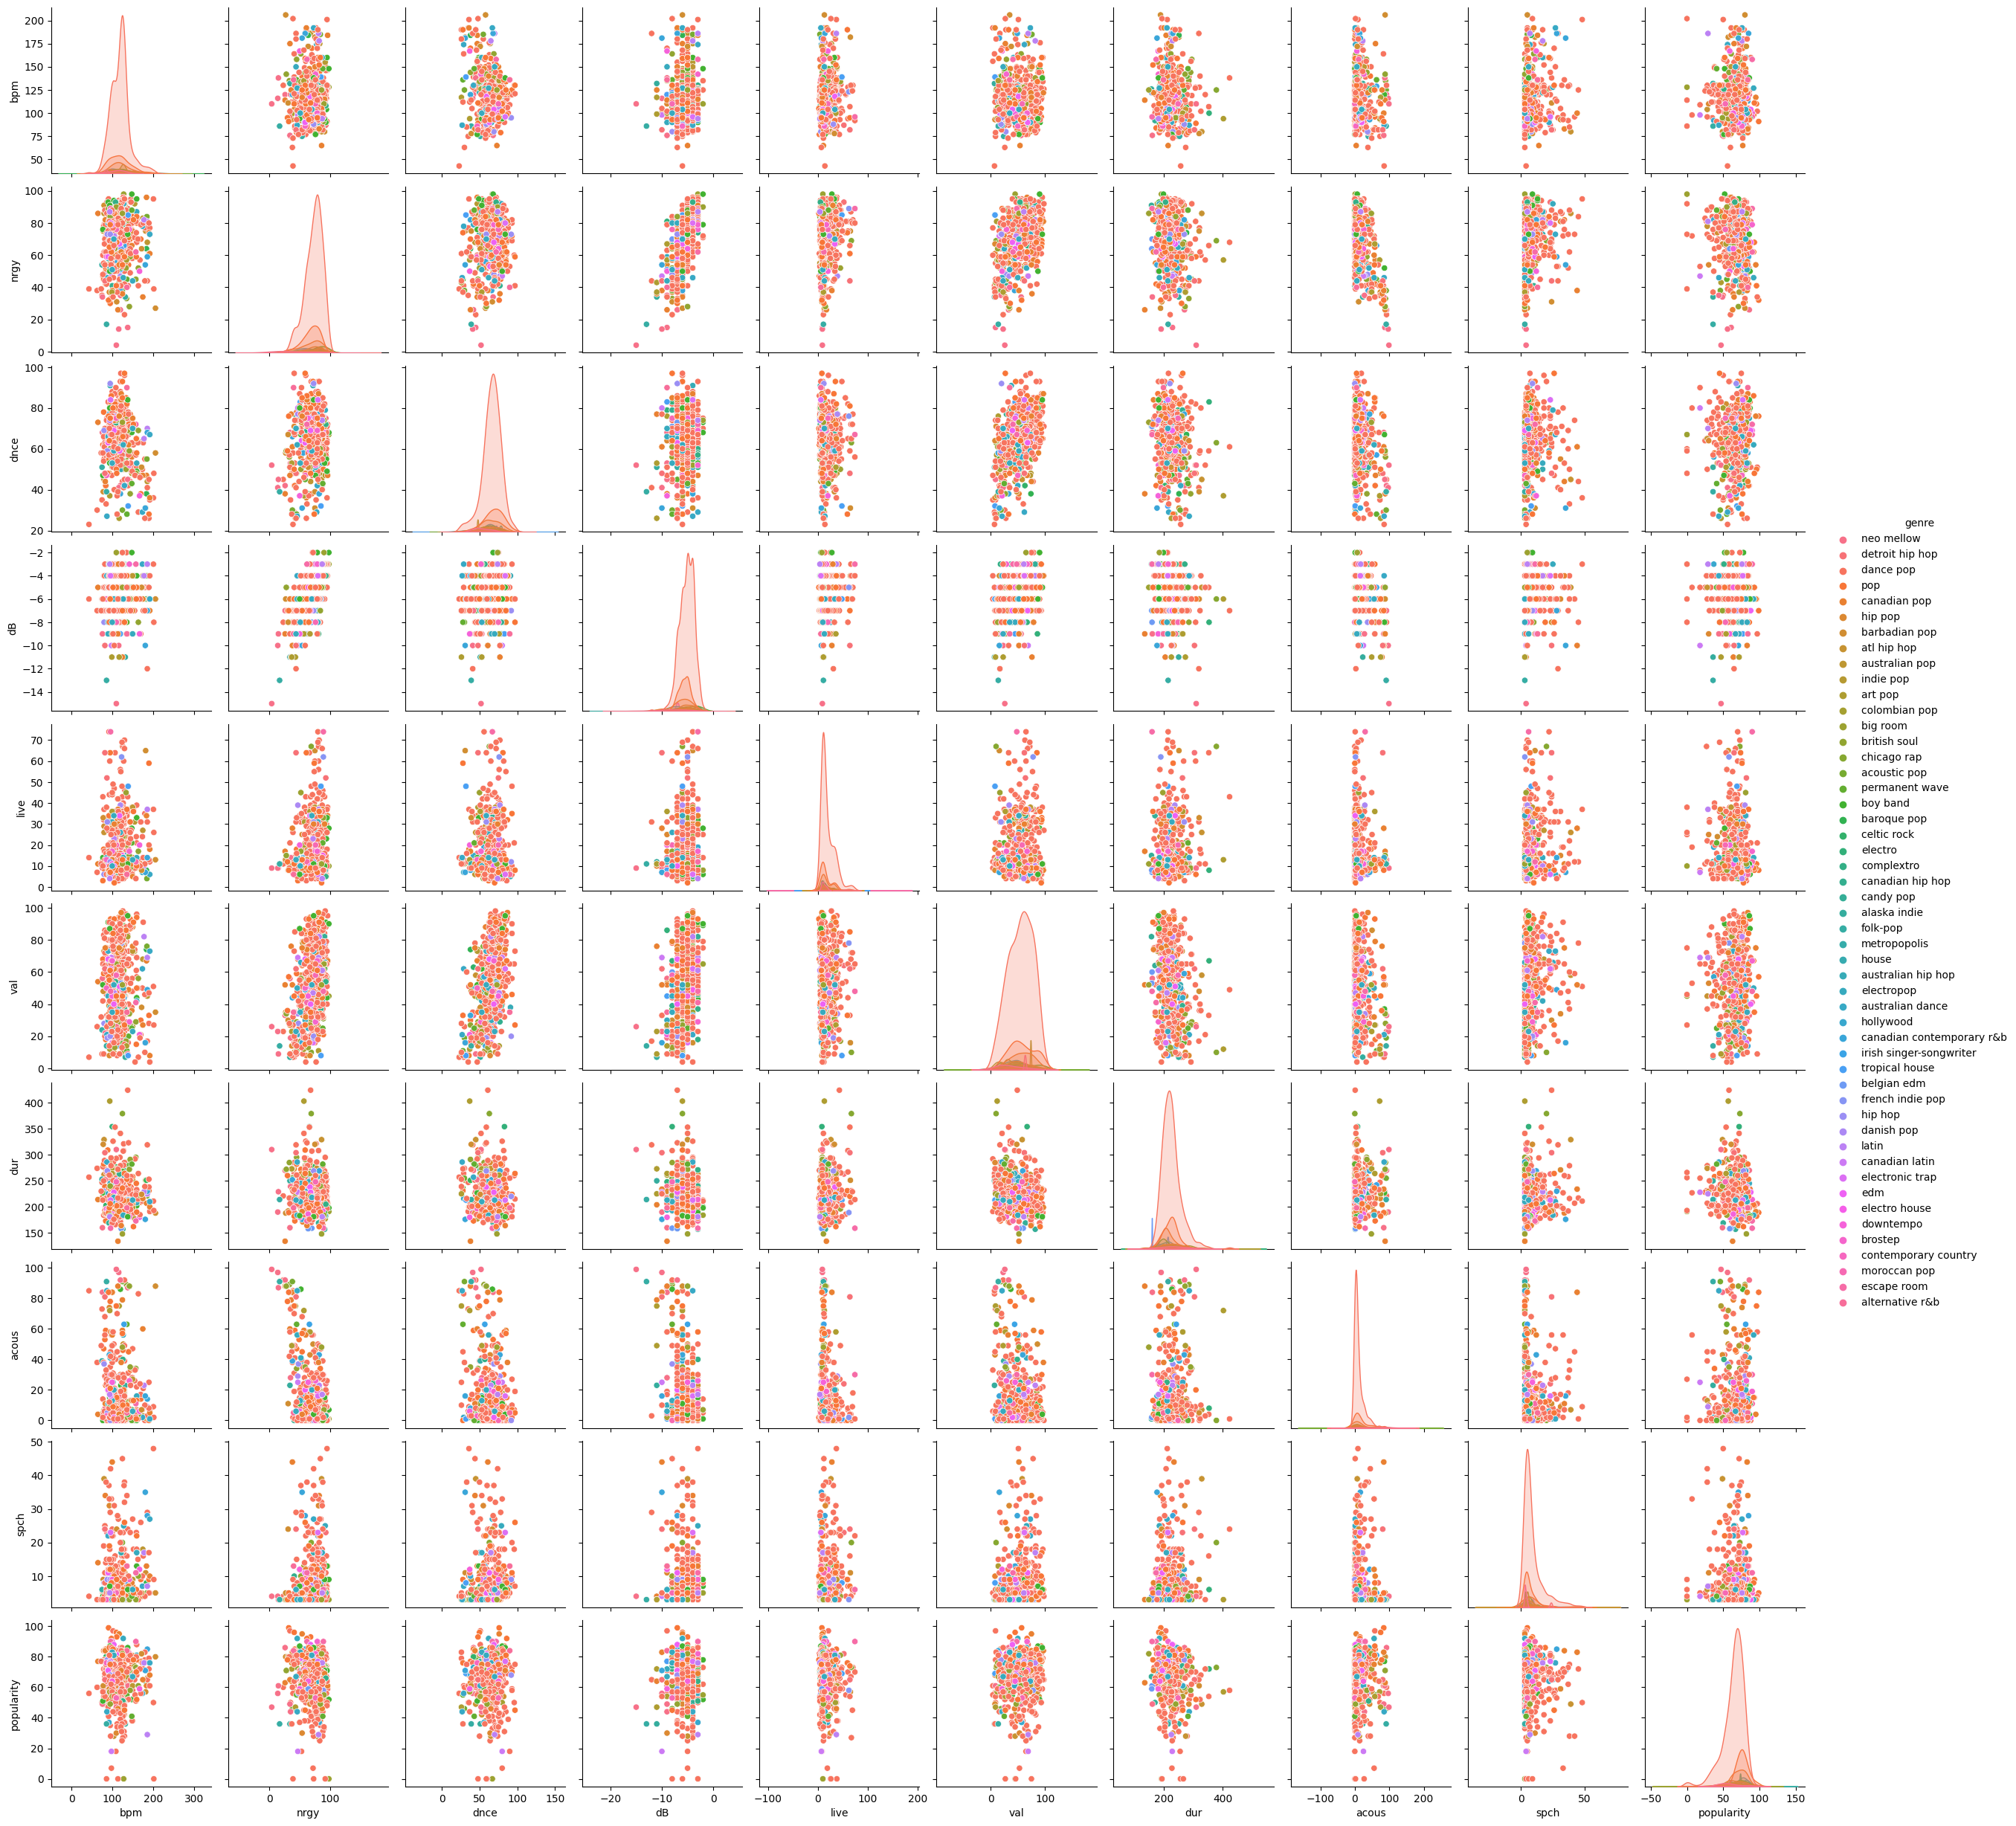

In [49]:
sns.pairplot(spotify_features, hue='genre')

<AxesSubplot:>

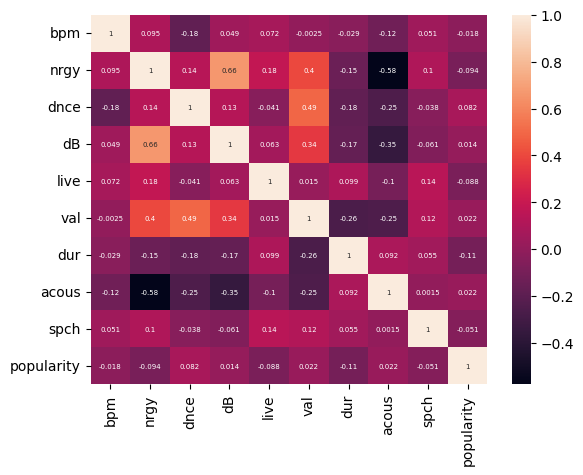

In [50]:
sns.heatmap(spotify_df.corr(), annot=True, annot_kws={"size": 5})

In [51]:
# checking correlation table
spotify_df.head()
spotify_df.corr(method='pearson')

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity
bpm,1.000000,0.095070,-0.176331,0.048817,0.072284,-0.002492,-0.029381,-0.121118,0.051148,-0.018128
nrgy,0.095070,1.000000,0.137382,0.663623,0.180074,0.400945,-0.145399,-0.576507,0.100965,-0.093693
dnce,-0.176331,0.137382,1.000000,0.129737,-0.040512,0.494928,-0.179794,-0.250560,-0.037757,0.082394
dB,0.048817,0.663623,0.129737,1.000000,0.062574,0.342983,-0.168415,-0.349600,-0.061267,0.014400
live,0.072284,0.180074,-0.040512,0.062574,1.000000,0.015081,0.098645,-0.099917,0.141947,-0.087770
val,-0.002492,0.400945,0.494928,0.342983,0.015081,1.000000,-0.263175,-0.252936,0.118355,0.021746
dur,-0.029381,-0.145399,-0.179794,-0.168415,0.098645,-0.263175,1.000000,0.091917,0.054747,-0.105707
acous,-0.121118,-0.576507,-0.250560,-0.349600,-0.099917,-0.252936,0.091917,1.000000,0.001483,0.021837
spch,0.051148,0.100965,-0.037757,-0.061267,0.141947,0.118355,0.054747,0.001483,1.000000,-0.050956
popularity,-0.018128,-0.093693,0.082394,0.014400,-0.087770,0.021746,-0.105707,0.021837,-0.050956,1.000000


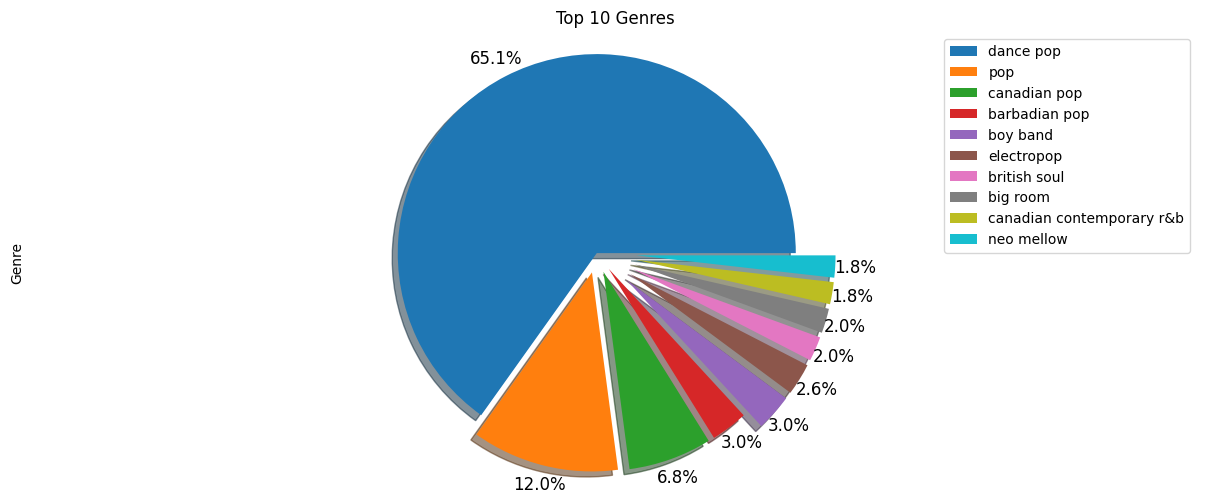

In [52]:
# creating a pie chart showing which genre ended up as a top song on average
explode_list = [0, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
fig = spotify_df['genre'].value_counts().nlargest(10).plot(kind='pie',
                                        figsize=(15,6),
                                        autopct='%1.1f%%',
                                        shadow=True,
                                        labels=None,
                                        pctdistance=1.1,
                                        textprops={'fontsize': 12},
                                        explode=explode_list,
                                        )


plt.title('Top 10 Genres')
plt.ylabel('Genre')
plt.axis('equal')
# add legend
plt.legend(labels=spotify_df['genre'].value_counts().nlargest(10).index, loc='upper right') 
plt.show()

<AxesSubplot:xlabel='spch', ylabel='popularity'>

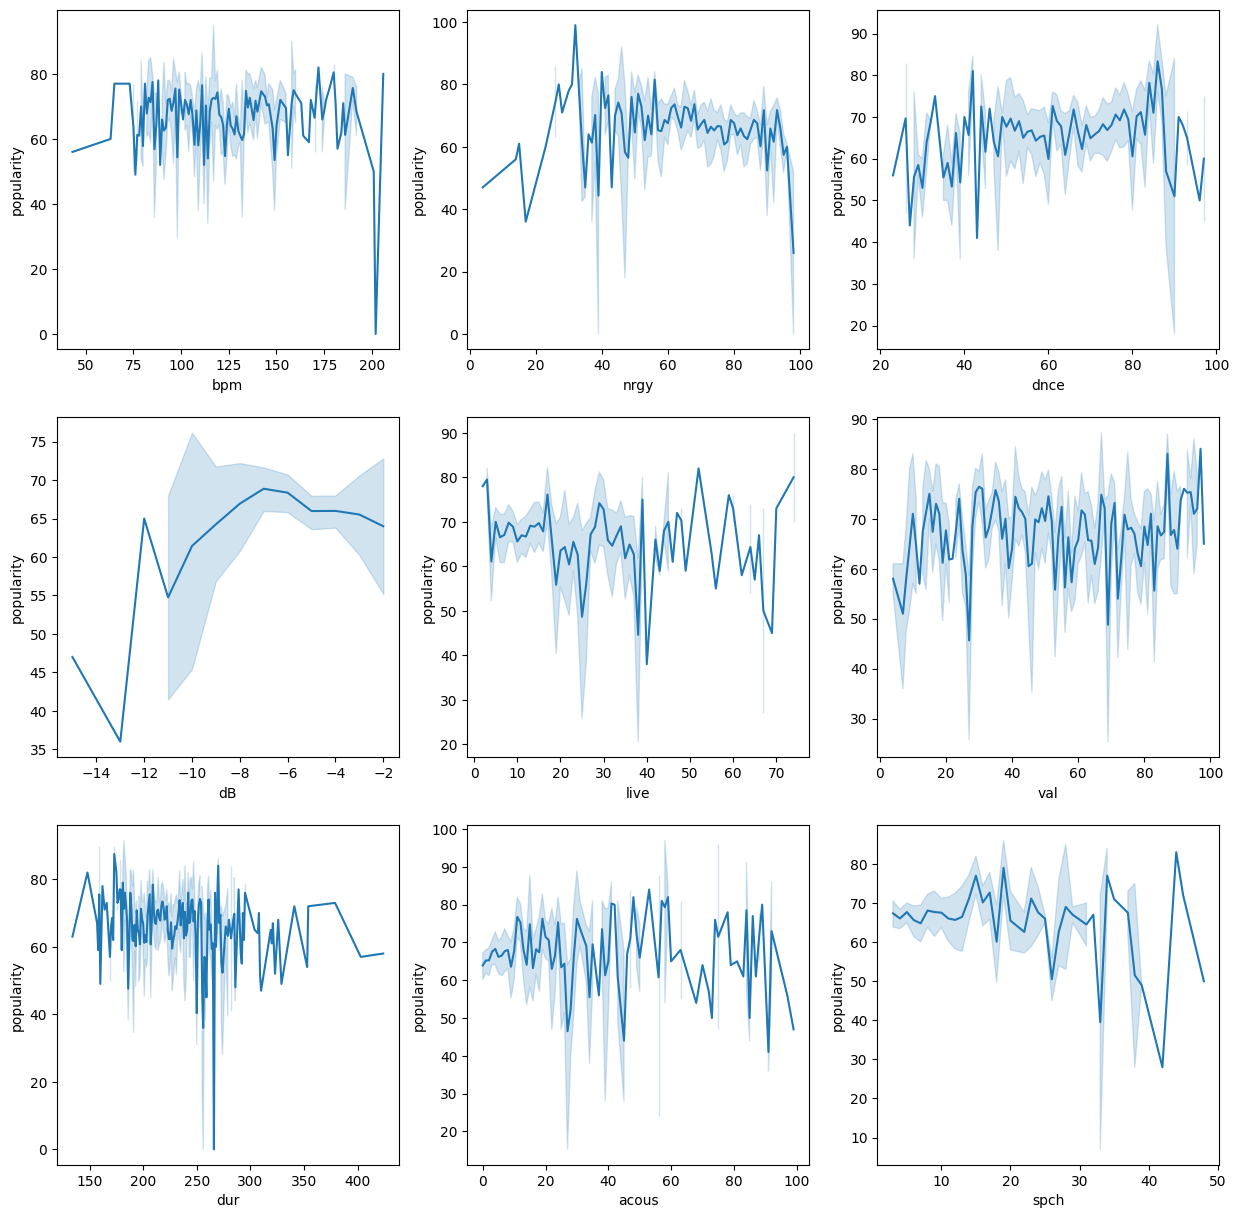

In [53]:
fig1, axes = plt.subplots(3, 3, figsize=(15,15))

# creating line plot showing bpm vs popularity
sns.lineplot(ax=axes[0, 0], x='bpm', y='popularity', data=spotify_df)

# creating line plot showing energy vs popularity
sns.lineplot(ax=axes[0, 1], x='nrgy', y='popularity', data=spotify_df)

# creating line plot showing danceability vs popularity
sns.lineplot(ax=axes[0, 2], x='dnce', y='popularity', data=spotify_df)

# creating line plot showing decibels vs popularity
sns.lineplot(ax=axes[1, 0], x='dB', y='popularity', data=spotify_df)

# creating line plot showing live vs popularity
sns.lineplot(ax=axes[1, 1], x='live', y='popularity', data=spotify_df)

# creating line plot showing val vs popularity
sns.lineplot(ax=axes[1, 2], x='val', y='popularity', data=spotify_df)

# creating line plot showing dur vs popularity
sns.lineplot(ax=axes[2, 0], x='dur', y='popularity', data=spotify_df)

# creating line plot showing acous vs popularity
sns.lineplot(ax=axes[2, 1], x='acous', y='popularity', data=spotify_df)

# creating line plot showing spch vs popularity
sns.lineplot(ax=axes[2, 2], x='spch', y='popularity', data=spotify_df)